# Comparison between the ages (after controlling for type and gender)

Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w?
- Are they the same? Is there a gradient?

Age effect - General Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Comparison between the ages (after controlling for type and gender)
global_52w_8w = results(dge, contrast= c(0,0,0,0,1,0,1/2,0,0,1/2), alpha=0.05, test="Wald")
global_104w_8w = results(dge, contrast= c(0,0,0,1,0,1/2,0,0,1/2,0), alpha=0.05, test="Wald")
global_104w_52w = results(dge, contrast= c(0,0,0,1,-1,1/2,-1/2,0,1/2,-1/2), alpha=0.05, test="Wald")

In [7]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')

In [8]:
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])
to_comp = c("52w VS 8w", "104w VS 8w", "104w VS 52w")

# Stats

In [9]:
global_stats = matrix(0, nrow=3, ncol=3)
rownames(global_stats) = to_comp
colnames(global_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
global_stats[1,] = get_stats_padj(global_52w_8w)
global_stats[2,] = get_stats_padj(global_104w_8w)
global_stats[3,] = get_stats_padj(global_104w_52w)
global_stats

Wald padj < 0.05 LFC > 0 (Wald padj < 0.05)
52w VS 8w   2157             1176                      
104w VS 8w  3192             1701                      
104w VS 52w 2284             1252                      
            LFC < 0 (Wald padj < 0.05)
52w VS 8w    981                      
104w VS 8w  1491                      
104w VS 52w 1032

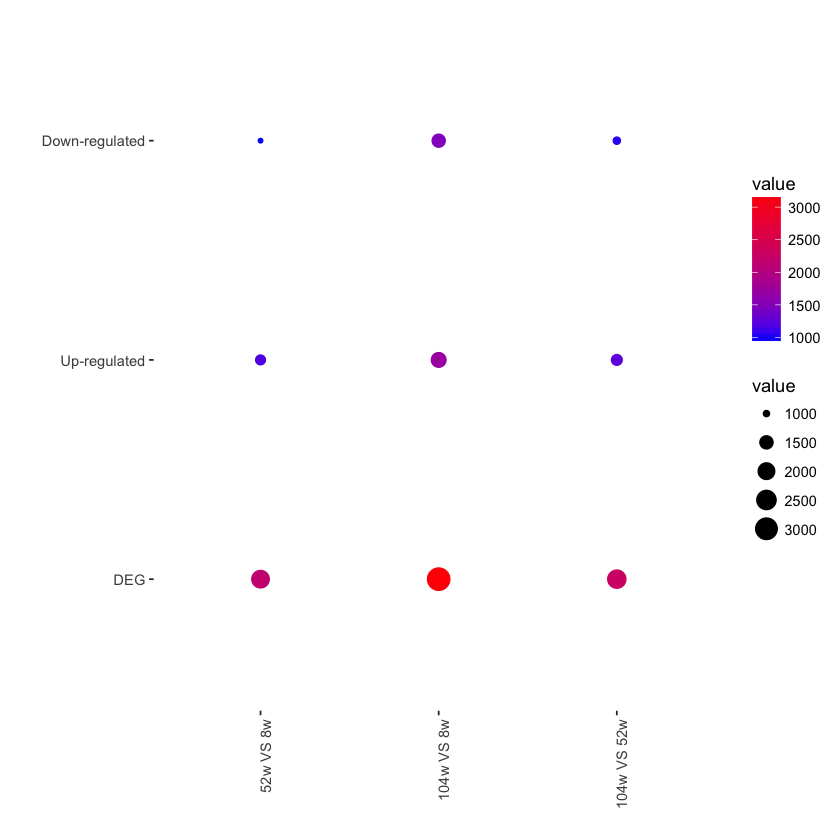

In [10]:
plot_stat_mat(global_stats)

# Differentially expressed genes

In [11]:
age_data = list(global_52w_8w, global_104w_8w, global_104w_52w)
names(age_data) = to_comp
age_deg = extract_diff_expr_genes(age_data, "age-effect/age/")

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”

# Counts

Genes that are differentially expressed in 52W vs 8W with abs(FC) > 2

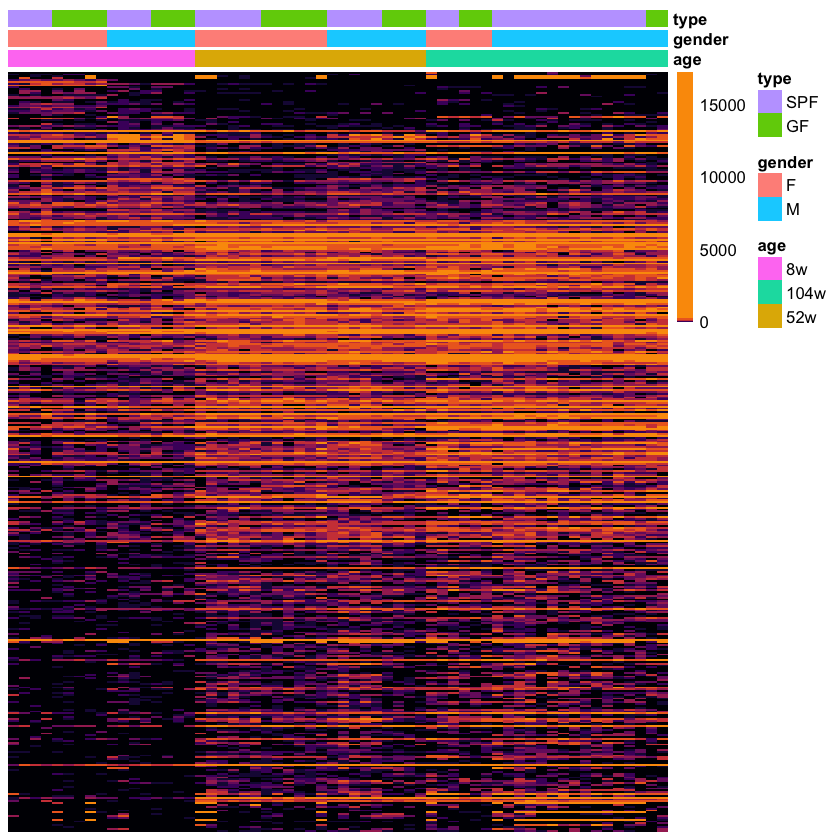

In [12]:
# 52w != 8w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>1),1])))
plot_count_heatmap(genes,samples, annot)

Genes that are differentially expressed in 104W vs 8W with abs(FC) > 2

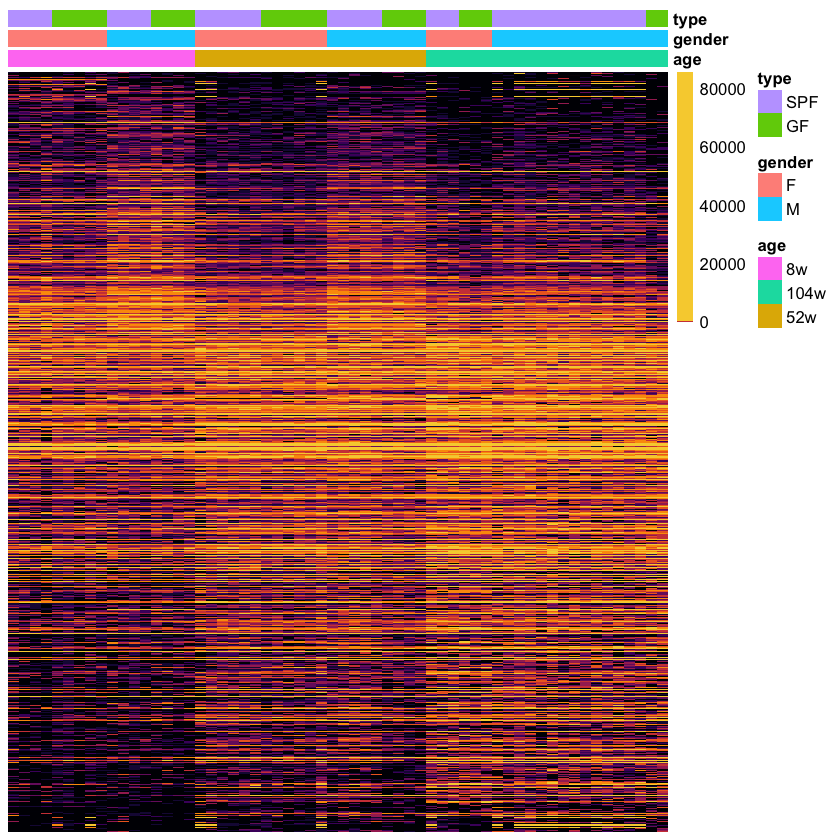

In [13]:
# 104w != 8w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,2])>1),2])))
plot_count_heatmap(genes,samples, annot)

Genes that are differentially expressed in 104W vs 52W with abs(FC) > 2

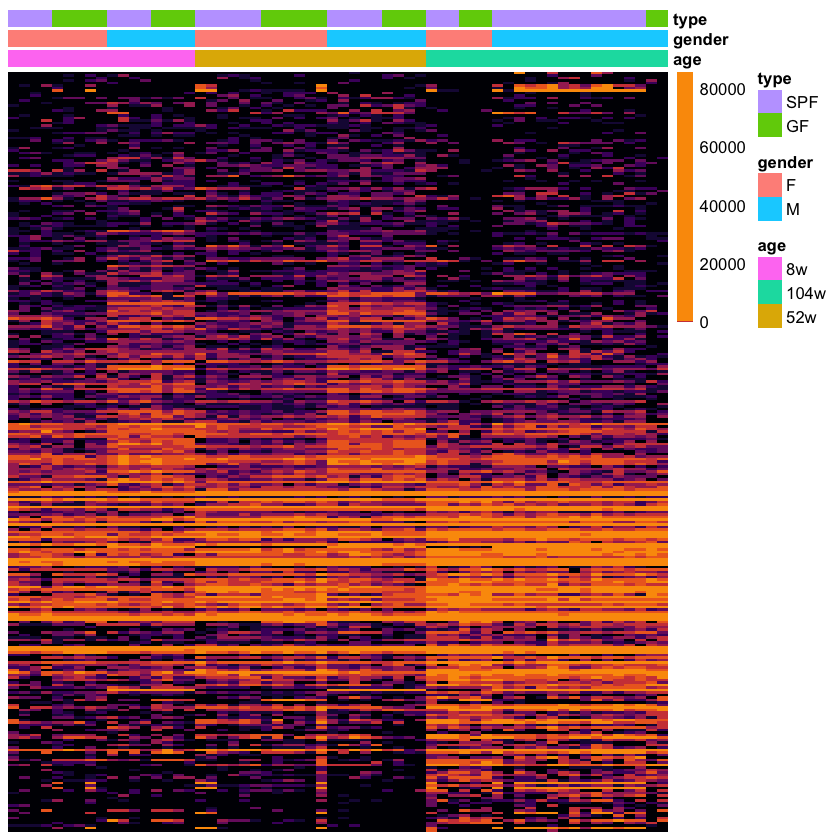

In [14]:
# 104w != 52w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

# Compare the numbers

Differentially expressed genes

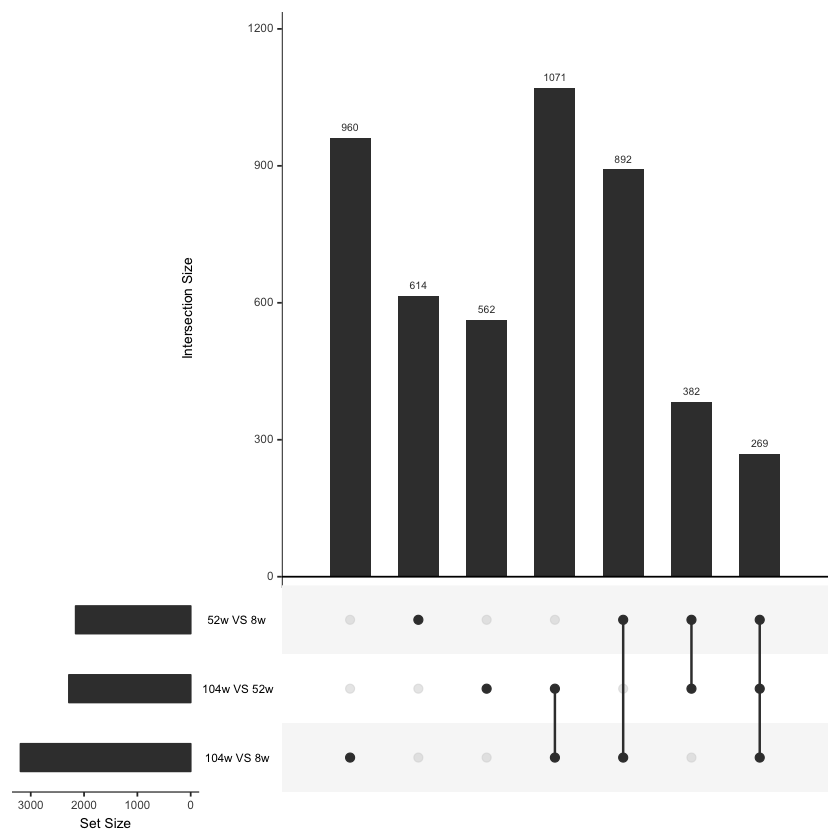

In [15]:
# Differentially expressed genes
upset(as.data.frame(age_deg$deg))

Differentially more expressed genes

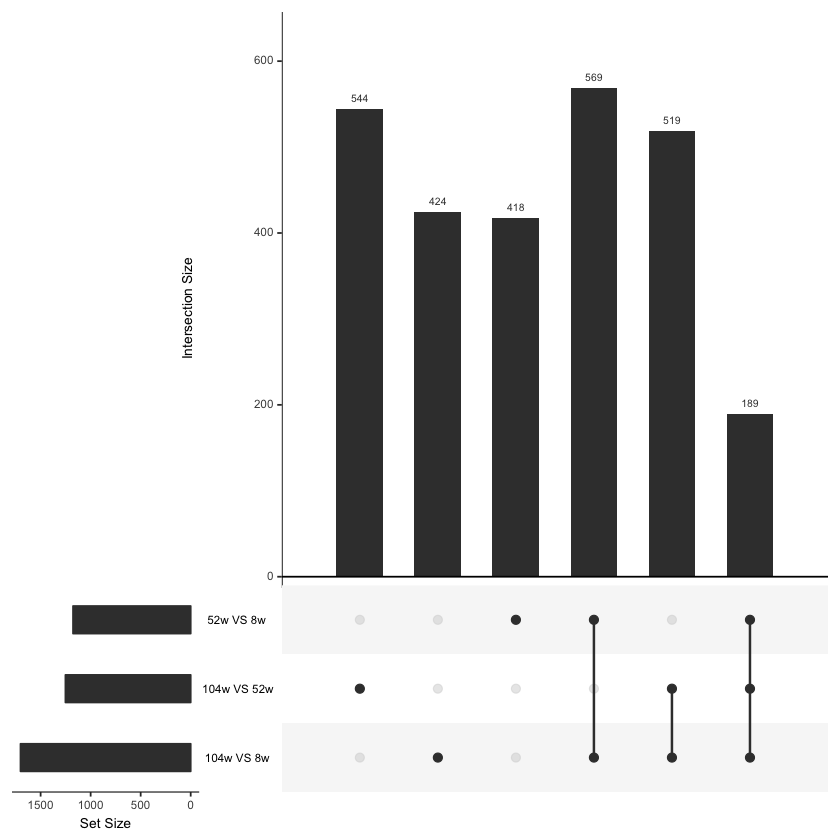

In [16]:
# Differentially more expressed genes
upset(as.data.frame(age_deg$pos))

Differentially less expressed genes

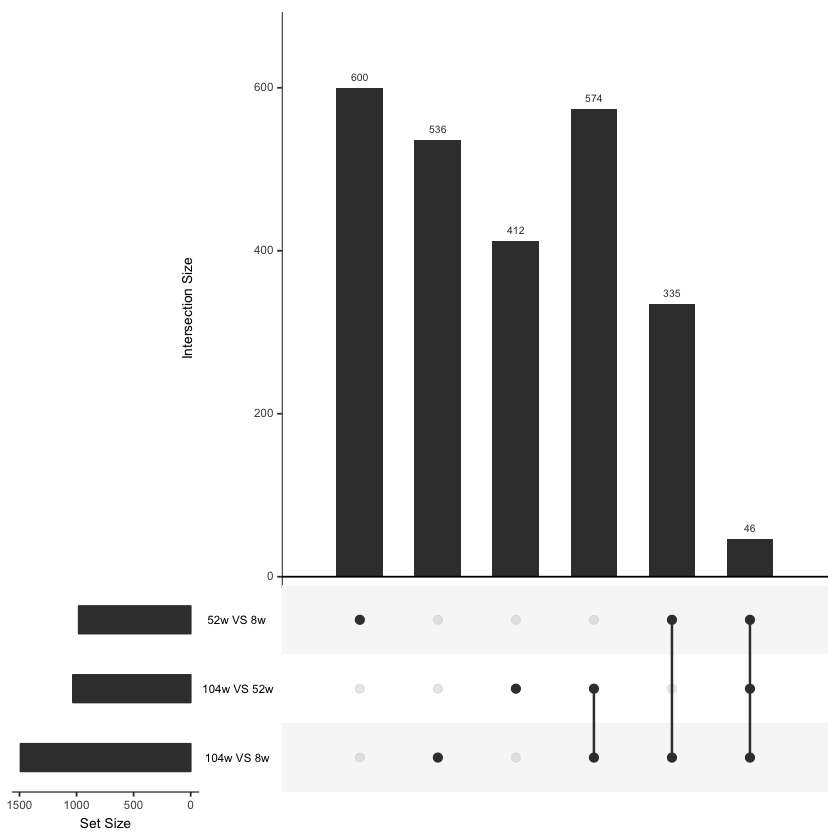

In [17]:
# Differentially less expressed genes
upset(as.data.frame(age_deg$neg))

# Compare the intersections in term of expressions

## Genes that are differentially expressed in 52W vs 8W and in 104W vs 8W (and not in 104w vs 52w)

In [18]:
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & is.na(age_deg$fc_deg[,3]),c(1,2)]
#heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("52w > 8w & 104w > 8w", "52w > 8w & 104w < 8w", "52w < 8w & 104w > 8w", "52w < 8w & 104w < 8w")
rep

52w > 8w & 104w > 8w 52w > 8w & 104w < 8w 52w < 8w & 104w > 8w
[1,] 563                  0                    0                   
     52w < 8w & 104w < 8w
[1,] 329

With abs(FC) > 1

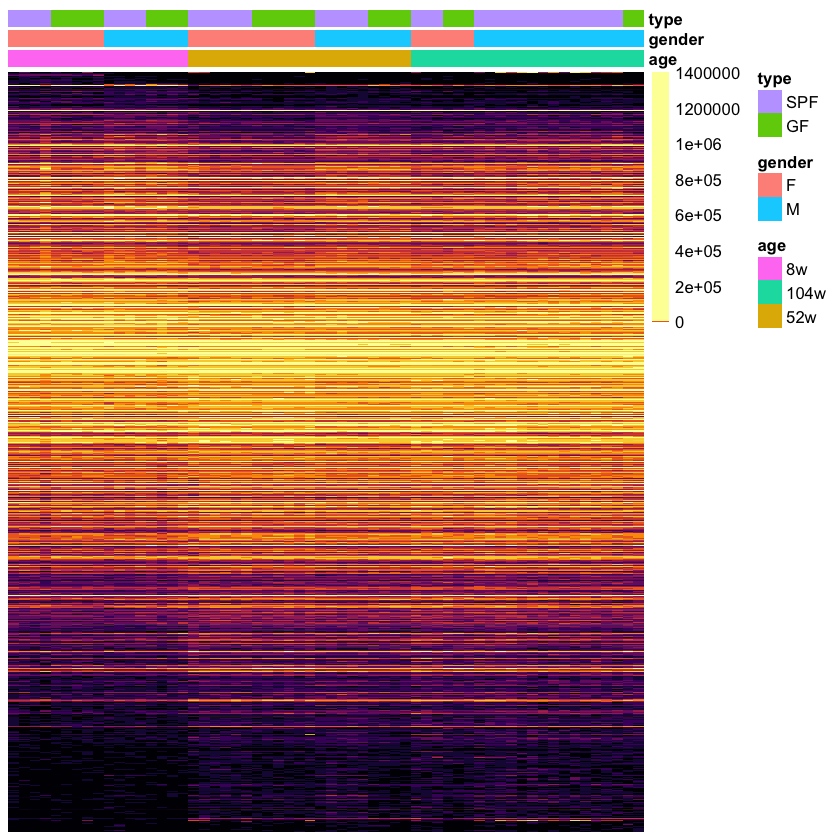

In [19]:
# 52w != 8w and 104w != 8w and 104w == 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & abs(age_deg$fc_deg[,2])>0 & is.na(age_deg$fc_deg[,3])),1])))
plot_count_heatmap(genes,samples, annot)

## Genes that are differentially expressed in 52W vs 8W and in 104W vs 52W (and not in 104w vs 52w)

In [20]:
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(1,3)]
#heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("52w > 8w & 104w > 52w", "52w > 8w & 104w < 52w", "52w < 8w & 104w > 52w", "52w < 8w & 104w < 52w")
rep

52w > 8w & 104w > 52w 52w > 8w & 104w < 52w 52w < 8w & 104w > 52w
[1,] 0                     107                   275                  
     52w < 8w & 104w < 52w
[1,] 0

With abs(FC) > 1

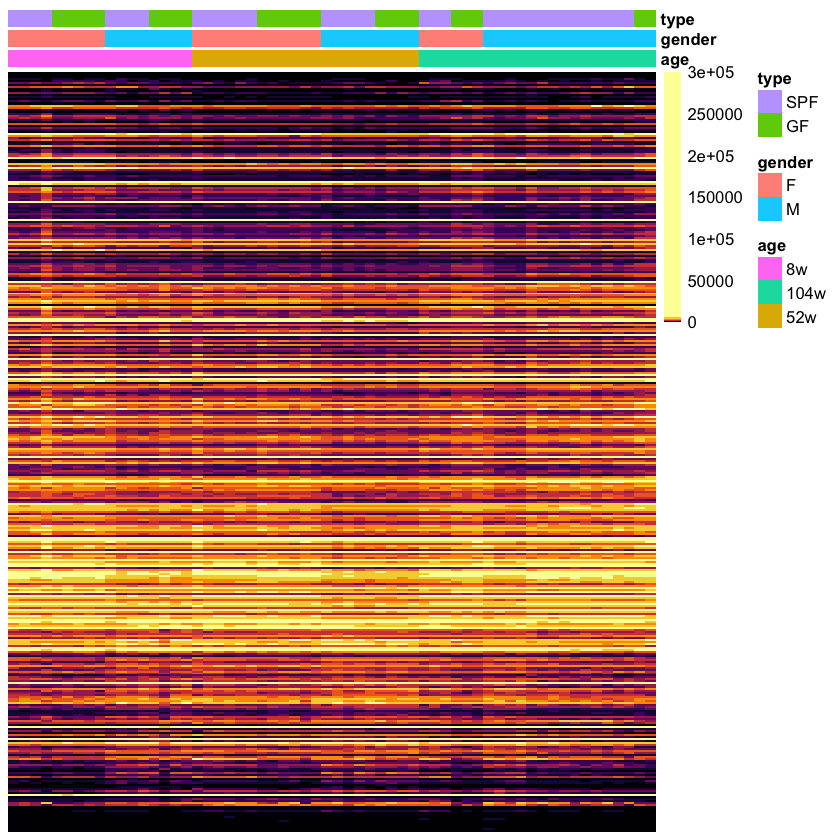

In [21]:
# 52w != 8w and 104w == 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & is.na(age_deg$fc_deg[,2]) & abs(age_deg$fc_deg[,3])>0),1])))
plot_count_heatmap(genes,samples, annot)

## Genes that are differentially expressed in 104W vs 8W and in 104W vs 52W (and not in 52w vs 8w)

In [22]:
# Genes that are differentially expressed in 104W vs 8W and in 104W vs 52W (and not in 52w vs 8w)
fc = age_deg$fc_deg[is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(2,3)]
#heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("104w > 8w & 104w > 52w", "104w > 8w & 104w < 52w", "104w < 8w & 104w > 52w", "104w < 8w & 104w < 52w")
rep

104w > 8w & 104w > 52w 104w > 8w & 104w < 52w 104w < 8w & 104w > 52w
[1,] 504                    0                      0                     
     104w < 8w & 104w < 52w
[1,] 567

With abs(FC) > 1

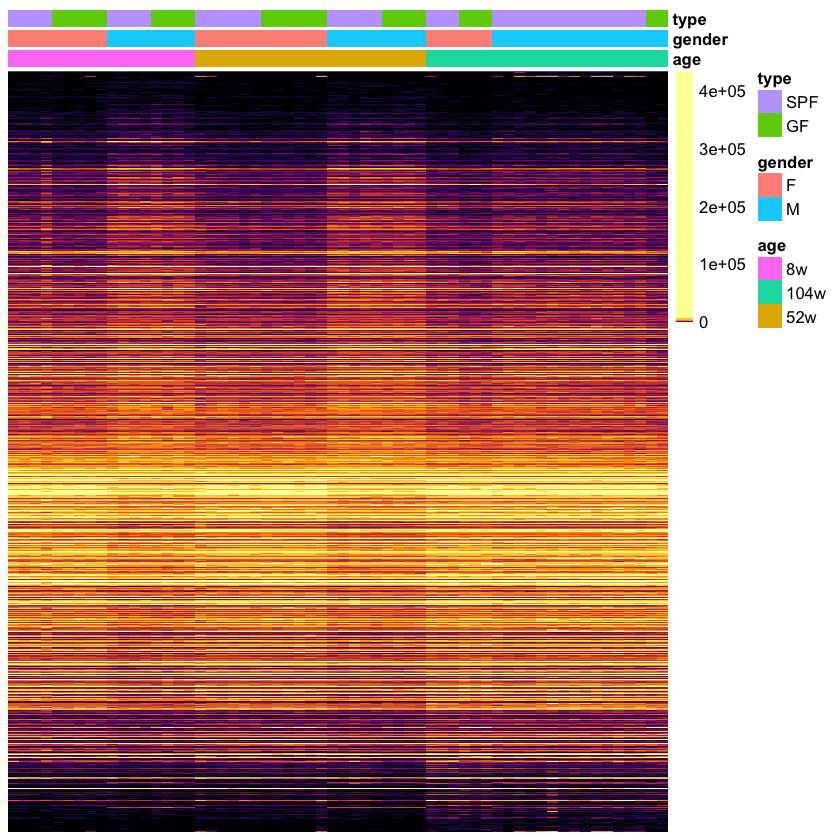

In [23]:
# 52w == 8w and 104w != 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(is.na(age_deg$fc_deg[,1]) & abs(age_deg$fc_deg[,2])>0 & abs(age_deg$fc_deg[,3])>0),2])))
plot_count_heatmap(genes,samples, annot)

## Genes that are differentially expressed in 52W vs 8W, in 104W vs 8W and in 104W vs 52W

In [24]:
# Genes that are differentially expressed in 52W vs 8W, in 104W vs 8W and in 104W vs 52W
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(1,2,3)]
#heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition_3col(fc)
colnames(rep) = c(
    "52w > 8w & 104w > 8w & 104w > 52w",
    "52w > 8w & 104w > 8w & 104w < 52w",
    "52w > 8w & 104w < 8w & 104w > 52w",
    "52w > 8w & 104w < 8w & 104w < 52w",
    "52w < 8w & 104w > 8w & 104w > 52w",
    "52w < 8w & 104w > 8w & 104w < 52w",
    "52w < 8w & 104w < 8w & 104w > 52w",
    "52w < 8w & 104w < 8w & 104w < 52w")
rep

52w > 8w & 104w > 8w & 104w > 52w 52w > 8w & 104w > 8w & 104w < 52w
[1,] 189                               6                                
     52w > 8w & 104w < 8w & 104w > 52w 52w > 8w & 104w < 8w & 104w < 52w
[1,] 0                                 7                                
     52w < 8w & 104w > 8w & 104w > 52w 52w < 8w & 104w > 8w & 104w < 52w
[1,] 15                                0                                
     52w < 8w & 104w < 8w & 104w > 52w 52w < 8w & 104w < 8w & 104w < 52w
[1,] 6                                 46

With abs(FC) > 1

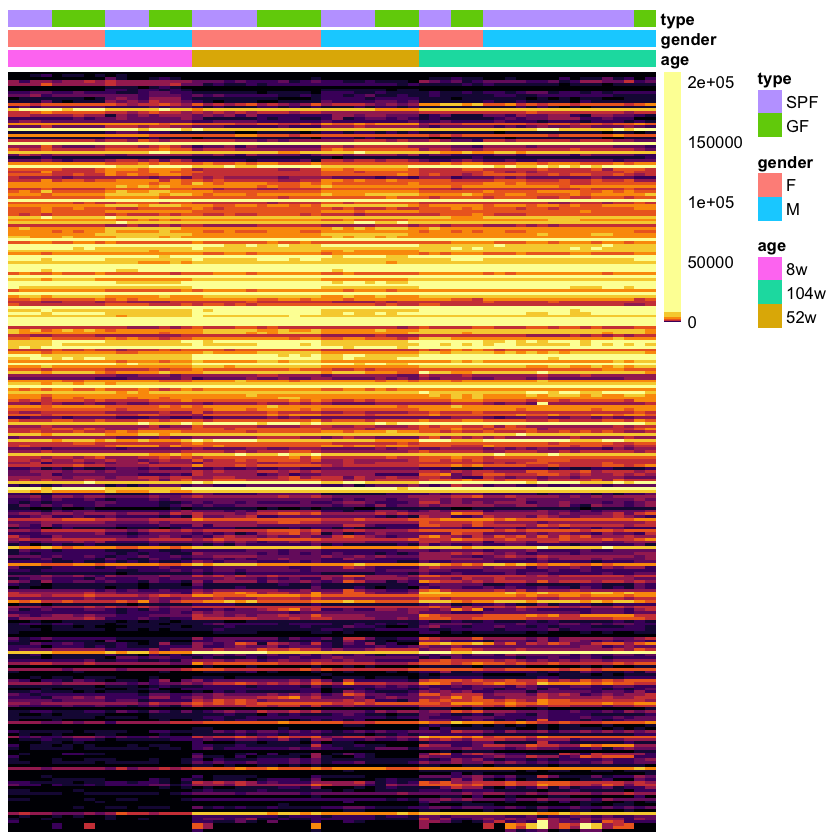

In [25]:
# 52w != 8w and 104w != 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & abs(age_deg$fc_deg[,2])>0 & abs(age_deg$fc_deg[,3])>0),1])))
plot_count_heatmap(genes,samples, annot)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

Order: 52w VS 8w, 104w VS 52w, 104w VS 8w

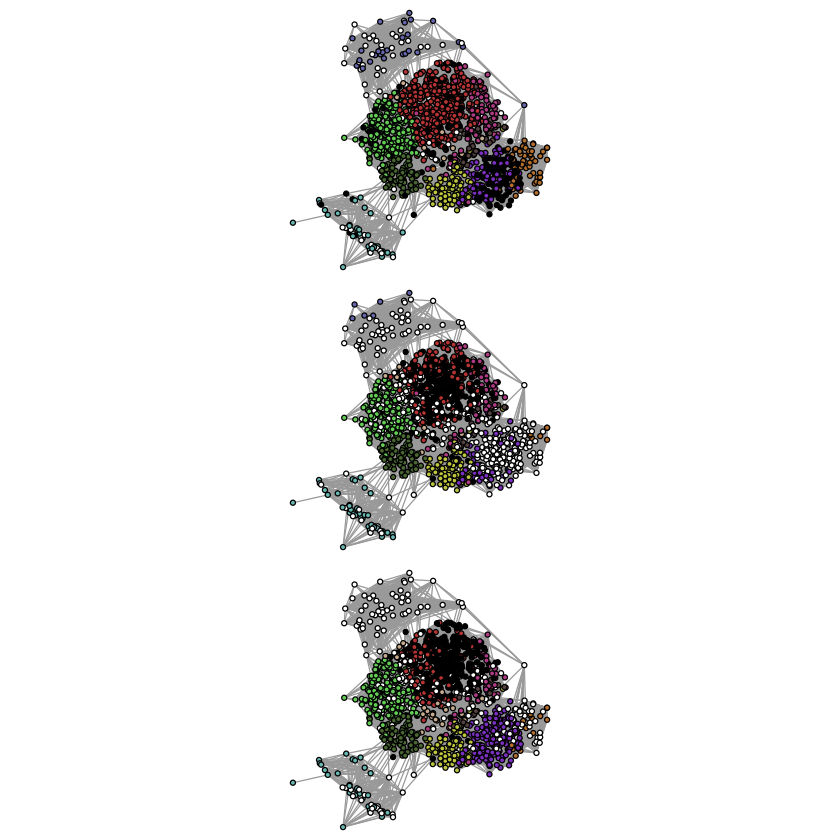

In [26]:
par(mfrow=c(3,1),mar=c(0,0,0,0))
col_52w_vs_8w = get_deg_colors(age_deg, "52w VS 8w", connected_gene_colors, module_nb) 
plot_net_with_layout(net, col_52w_vs_8w, pal2, layout, add_legend = FALSE)
col_104w_vs_52w = get_deg_colors(age_deg, "104w VS 52w", connected_gene_colors, module_nb) 
plot_net_with_layout(net, col_104w_vs_52w, pal2, layout, add_legend = FALSE)
col_104w_vs_8w = get_deg_colors(age_deg, "104w VS 8w", connected_gene_colors, module_nb) 
plot_net_with_layout(net, col_104w_vs_8w, pal2, layout, add_legend = FALSE)

# GO analysis

In [27]:
full_go_desc = age_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = age_deg$GO_wall[[1]][,"category"]

## Biological process

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

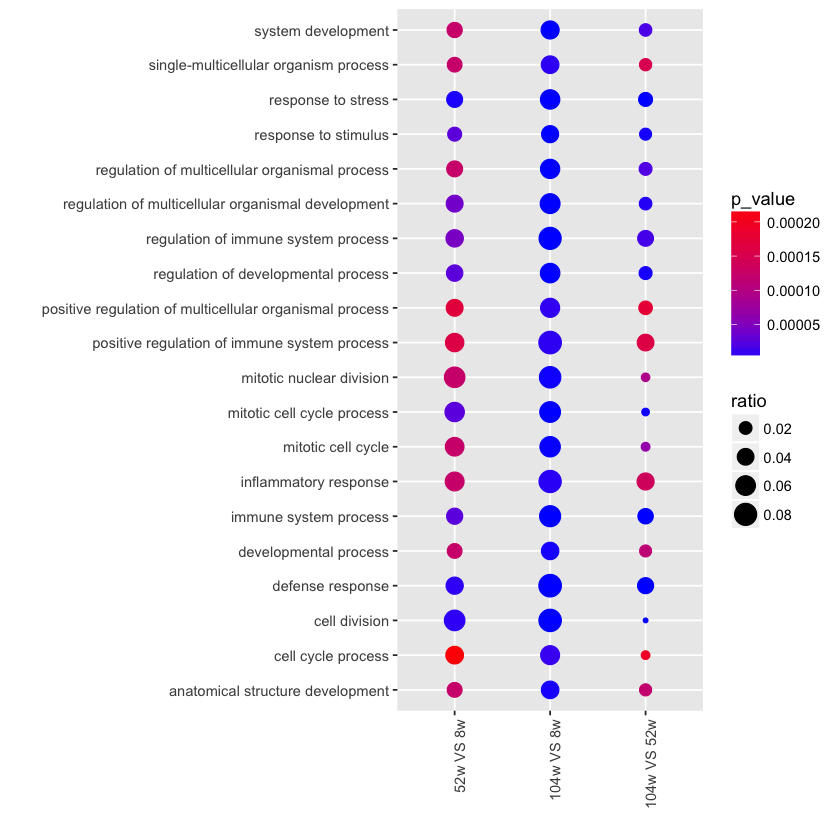

In [28]:
plot_top_go(age_deg$over_represented_GO,
            age_deg$GO_wall,
            "BP",
            c("52w VS 8w", "104w VS 8w", "104w VS 52w"),
            20)

Network based on description similarity

In [29]:
BP_network = create_GO_network(age_deg, "BP", BP_GO)

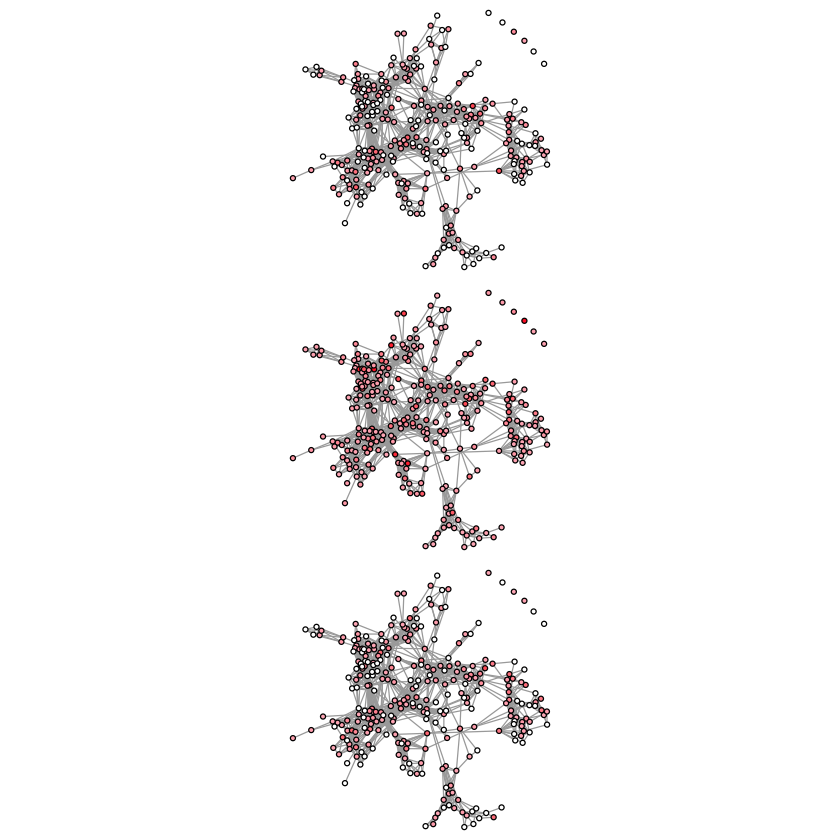

In [30]:
par(mfrow=c(3,1),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "52w VS 8w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w", full_go_desc, plot_interactive = FALSE)

52w VS 8w

In [31]:
# 52w VS 8w
plot_GO_networks(BP_network, "52w VS 8w", full_go_desc, plot_non_interactive = FALSE)

HTML widgets cannot be represented in plain text (need html)

104w VS 52w

In [32]:
# 104w VS 52w
plot_GO_networks(BP_network, "104w VS 52w", full_go_desc, plot_non_interactive = FALSE)

HTML widgets cannot be represented in plain text (need html)

104w VS 8w

In [33]:
# 104w VS 8w
plot_GO_networks(BP_network, "104w VS 8w", full_go_desc, plot_non_interactive = FALSE)

HTML widgets cannot be represented in plain text (need html)

## Cellular components

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

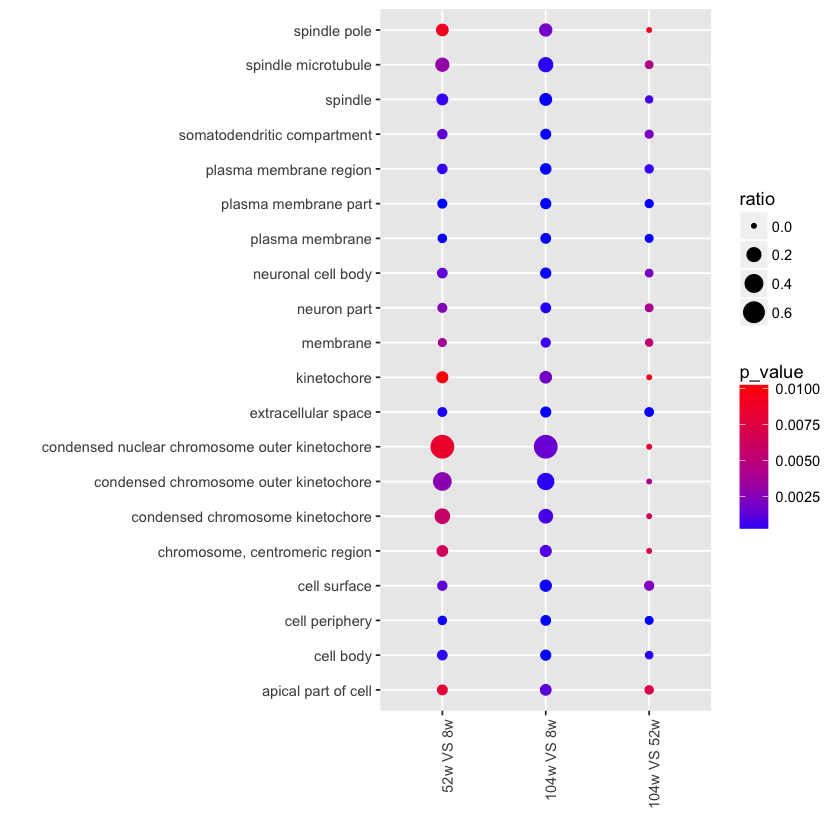

In [34]:
plot_top_go(age_deg$over_represented_GO,
            age_deg$GO_wall,
            "CC",
            c("52w VS 8w", "104w VS 8w", "104w VS 52w"),
            20)

In [35]:
CC_network = create_GO_network(age_deg, "CC", CC_GO)

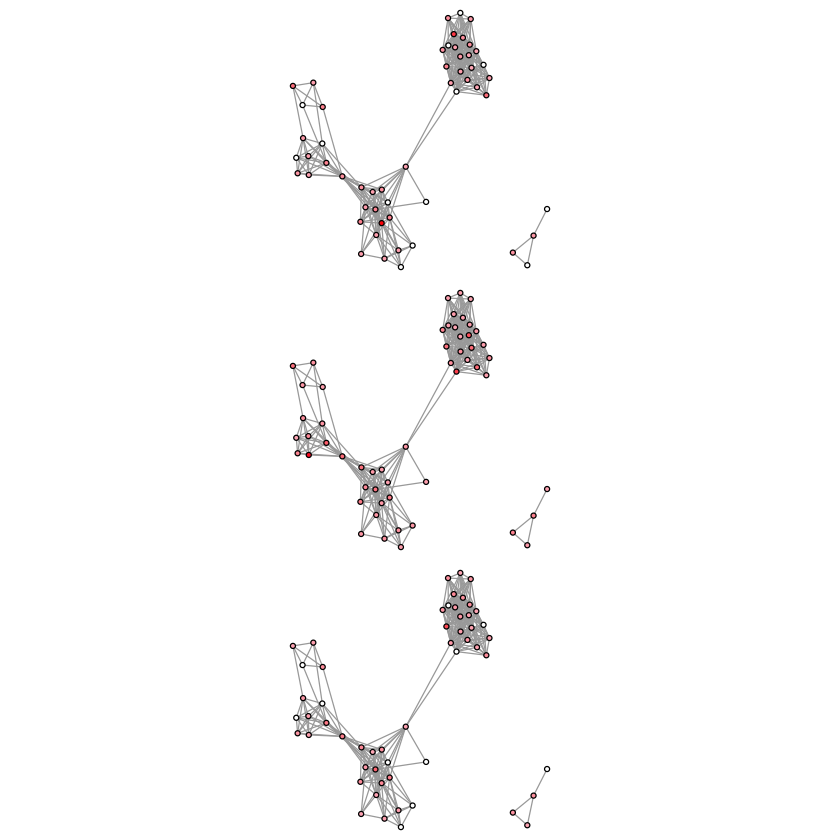

In [36]:
par(mfrow=c(3,1),mar=c(0,0,0,0))
plot_GO_networks(CC_network, "52w VS 8w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 8w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 52w", full_go_desc, plot_interactive = FALSE)

## Molecular functions

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

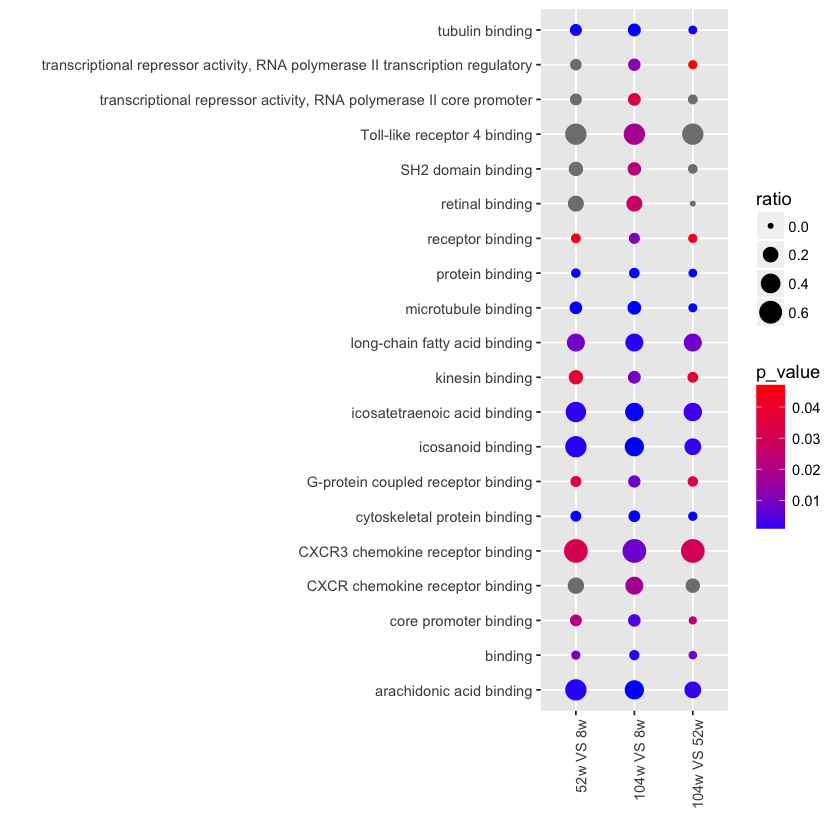

In [37]:
plot_top_go(age_deg$over_represented_GO,
            age_deg$GO_wall,
            "MF",
            c("52w VS 8w", "104w VS 8w", "104w VS 52w"),
            20)

In [38]:
MF_network = create_GO_network(age_deg, "MF", MF_GO)

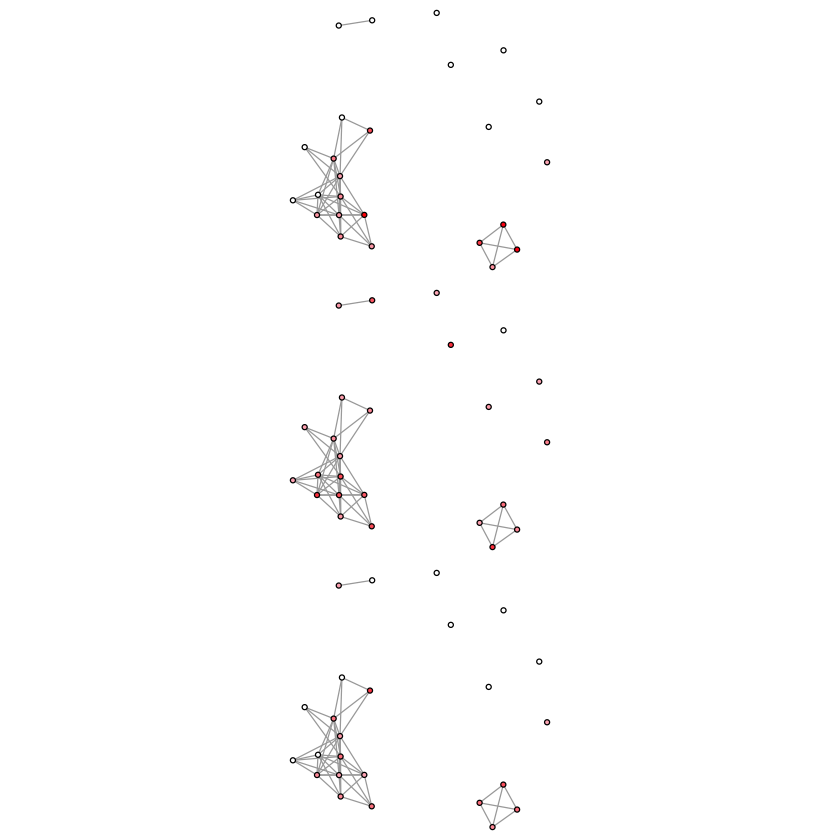

In [39]:
par(mfrow=c(3,1),mar=c(0,0,0,0))
plot_GO_networks(MF_network, "52w VS 8w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 8w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 52w", full_go_desc, plot_interactive = FALSE)

# KEGG pathways

In [40]:
plot_kegg_pathways(age_deg$over_represented_KEGG[,"category"],
                   age_deg$fc_deg,
                   "../results/dge/age-effect/age/over_repr_kegg/")

[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."


Pathway graphs available at [../results/dge/age-effect/age/over_repr_kegg/](../results/dge/age-effect/age/over_repr_kegg/)

In [41]:
plot_kegg_pathways(age_deg$under_represented_KEGG[,"category"],
                   age_deg$fc_deg,
                   "../results/dge/age-effect/age/under_repr_kegg/")

[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."
[1] "Note: 59 of 4750 unique input IDs unmapped."


Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in colnames(plot.data)[c(1, 3, 9:ncs)] <- c("kegg.names", "all.mapped", :
“number of items to replace is not a multiple of replacement length”Warning message in file.rename(from = paste("mmu", cat, ".pathview.multi.png", sep = ""), :
“cannot re

Pathway graphs available at [../results/dge/age-effect/age/under_repr_kegg/](../results/dge/age-effect/age/under_repr_kegg/)